<h1 align="center"> Recommender Systems<h1/>

## Content
- What is Recommendation System
- The two main ways to build a recommendation system
- A simple Popularity based Recommender system
- A Collaborative Filtering Model
- Evaluating a Recommendation system

Let's get started!!

A recommender system or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" that a user would give to an item. 

![recommender_system_info.jpg](../recommender_system_info.jpg) 

In [1]:
## Explain

## Types of Recommendation System

- Recommend the most popular items
-  Using a classifier to make recommendation
-  Recommendation Algorithms

Lets take a look at each of them

## Recommend the most popular items

Lets take a brief moment to think what would we would recommend to others. The answer that strikes first is the most **popular Item**. This is exactly what we will be covering here. Technicaly this is super fast but id does come with a major drawback which is lack of personalization. Lets take an example of the [MovieLens 100K](https://grouplens.org/datasets/movielens/100k/) data set. This dataset has many files but we will be looking at a few of these files.  Lets explore the data a bit

In [2]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

We now begin by importing data 

In [3]:
## Load the Ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = read_table('../data/ml-100k//u.data',header=None,sep='\t')
ratings.columns = r_cols

i_cols = ['movie_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = read_table('../data/ml-100k//u.item', sep='|',names=i_cols,
 encoding='latin-1')

In [4]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Note Before proceeding lets explore the data a bit. We begin by merging the two data frames items and ratings.

## Lets build our own popularity based recommender system


Now lets get going with building our first recommender system. Lets combine our datasets to make it more informative.

In [5]:
new_data = pd.merge(items,ratings,on='movie_id')
new_data  = new_data[['movie_id','movie title','user_id','rating']]

Before proceeding to build the Lets take a moment to review how we would recommend movies given some data? 

- Find the unique users
- Count the number of times the movie has been seen.
- [Rank](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rank.html) the the scores (counts) 

In [6]:
def popularity(train,title,ids):
    train_data_grouped = train.groupby([title])[ids].count().reset_index()  #user_id  #movie title
    train_data_grouped.rename(columns = {ids: 'score'},inplace=True)            
    train_data_sort = train_data_grouped.sort_values(['score',title], ascending = [0,1])            
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    popularity_recommendations = train_data_sort.head(10) 
    return popularity_recommendations

In [7]:
items

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
popularity(new_data,'movie title','user_id')

,movie title,score,Rank
1398,Star Wars (1977),584,1.0
333,Contact (1997),509,2.0
498,Fargo (1996),508,3.0
1234,Return of the Jedi (1983),507,4.0
860,Liar Liar (1997),485,5.0
460,"English Patient, The (1996)",481,6.0
1284,Scream (1996),478,7.0
1523,Toy Story (1995),452,8.0
32,Air Force One (1997),431,9.0
744,Independence Day (ID4) (1996),429,10.0


## Kab aur kyun shortcommings

## Collaborative Filtering

In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

![Collaborative_filtering.gif](../images/Collaborative_filtering.gif)

## Types of Collaborative Filtering.

## User Based Collaborative Filtering

Here we find look alike customers (based on similarity) and offer products which first customer’s look alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every customer pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

1. Build a matrix of things each user bought viewed rated
2. compute similarity scores between users
3. find users similar to you
4. Recommend stuff they bought/viewed/rated that you haven’t yet

## Problems 
1. People fickle, tastes change
2. They are usually many more people than things
3. People do bad things





## Item Based Collaborative Filtering

 It is quite similar to previous algorithm, but instead of finding customer look alike, we try finding item look alike. Once we have item look alike matrix, we can easily recommend alike items to customer who have purchased any item from the store. This algorithm is far less resource consuming than user-user collaborative filtering. 

1. Find every pair of movies that were watched by the same person
2. Measure the similarity of rating across all the users who watched both
3. Sort movie then by similarity strength


## Interesting fact 

Item- Item Collaboration is extensively used in amazon and they came out with it in great detai. You can read more at [amazon](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf)

----------
Lets get started with building our Item based collaborative recommender system. For convinience Lets split this up into two parts. 

- To find Similarities between items
- To Recommend them to users

To begin we will use the pandas pivot table to look at relationships between movies and we will use the pivot table in pandas

In [9]:
movie_ratings = new_data.pivot_table(index=['user_id'],columns=['movie title'],values='rating')

In [10]:
movie_ratings.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above table gives information about the rating given by each user against the movie title. There are many **NaN's** as it is not necessary for each user to review each movie. To proceed lets start by looking at one the geeks favourite Star Wars and see how it is correlated pairwise with other movies in the table.


____

Wait a minute !!! But we how do we decide if it is correlated or not Here comes the use of similarity function

## Similarity Function

So to decide the similarity between two items in the dataset lets briefly look at the popular similarity functions.

### Terminology

-Let $\textbf{$r_x$}$ denote the rating of the item x given by the user and $\textbf{$r_y$}$ be the rating of item y. To find the similarity pairwise between two items. The following metrics can be used.


## cosine Index

$$sim(\textbf{$r_{x}$},\textbf{$r_y$}) = cos(\textbf{$r_x$},\textbf{$r_y$}) = \dfrac{\textbf{$r_x$}\textbf{$r_y$}}{||\textbf{$r_x$}||\  ||\textbf{$r_y$}||} $$ 

Major problem is it treats missing values as negetive.

## Pearson Index

$S_{xy}$ = Items x and y both have ratings

$$sim(\textbf{$r_{x}$},\textbf{$r_y$})=\dfrac{\sum_{x\epsilon s}(\textbf{$r_{xs}$}- \textbf{$r_{xm}$})(\textbf{$r_{ys}$}- \textbf{$r_y$})}{(\sqrt{\sum_{s\epsilon s_{xy}}(\textbf{$r_{xs}$}- \textbf{$r_{xm}$})^2}(\sqrt{\sum_{s\epsilon s_{xy}}(\textbf{$r_{ys}$}- \textbf{$r_{ym}$})^2}} $$ 

## Jacard Index

$$Jacard \ Index = \dfrac{Number \ in\  both \  sets}{Number \  in\  either \ set}  $$

For our cases lets stick to Pearson Index. Now that we have understood how to find similar items lets start by finding movies similar to Star Wars

In [11]:
[print(movie) for movie in movie_ratings.columns]

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

It's My Party (1995)
It's a Wonderful Life (1946)
JLG/JLG - autoportrait de décembre (1994)
Jack (1996)
Jack and Sarah (1995)
Jackal, The (1997)
Jackie Brown (1997)
Jackie Chan's First Strike (1996)
Jade (1995)
James and the Giant Peach (1996)
Jane Eyre (1996)
Jason's Lyric (1994)
Jaws (1975)
Jaws 2 (1978)
Jaws 3-D (1983)
Jean de Florette (1986)
Jefferson in Paris (1995)
Jeffrey (1995)
Jerky Boys, The (1994)
Jerry Maguire (1996)
Jimmy Hollywood (1994)
Jingle All the Way (1996)
Joe's Apartment (1996)
Johnny 100 Pesos (1993)
Johnny Mnemonic (1995)
Johns (1996)
Journey of August King, The (1995)
Joy Luck Club, The (1993)
Jude (1996)
Judge Dredd (1995)
Judgment Night (1993)
Jumanji (1995)
Jungle Book, The (1994)
Jungle2Jungle (1997)
Junior (1994)
Jupiter's Wife (1994)
Jurassic Park (1993)
Juror, The (1996)
Jury Duty (1995)
Just Cause (1995)
Kalifornia (1993)
Kama Sutra: A Tale of Love (1996)
Kansas City (1996)
Kaspar Hauser (1993)
Kazaam (1996)
Keys to Tulsa (1997)
Kicked in the Head (1997

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
StarWarsRatings = movie_ratings['Star Wars (1977)'] 
StarWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Now we chek the pair wise correlation of user rating of StarWars with other Movies in the column using corrwith function

In [13]:
similarmovies = movie_ratings.corrwith(StarWarsRatings)
similarmovies =similarmovies.dropna()
df = pd.DataFrame(similarmovies)
df.head()

,0
movie title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


What went wrong ?? Here The possible explanation is that our movies are getting messed up by a handfull of people who saw obscure movies. So we need to get rid of the movies that only a few people watched that are producing wrong results. Lets construct a data frame to see how many rating exists for each Movie and the average rating while we are at it.

In [14]:
movie_stats = new_data.groupby('movie title').agg({'rating':[np.size,np.mean]})

In [15]:
check = movie_stats.sort_values([('rating','mean')],ascending=False)

In [16]:
check.head()

rating     
                                             size mean
movie title                                           
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

Now we observe clearly that there are movies which have very few rating counts (size). Thus we set a threshold of movie to have a count atleast 100 ratings. 

In [17]:
popularmovies = movie_stats['rating']['size']>=100

movie_stats[popularmovies].sort_values([('rating','mean')],ascending=False)[:10]

rating          
                                   size      mean
movie title                                      
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    584  4.359589
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

This gives us results which are much better and while we are at lets take a better look at our data.

In [18]:
df = movie_stats[popularmovies].join(DataFrame(similarmovies,columns=['similarity']))
df.sort_values('similarity',ascending=False)[:20]

,"(rating, size)","(rating, mean)",similarity
movie title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729


## Accomplished

We found similarities between Star Wars and other movies in the data set. 

## Building a full blown recommender system.

We stick to our pearson similarity metric for the same.

- compute the correlation score for every pair in the matrix
- choose a user and find his movies of interest
- recommend movies to him
- Improve on the recommendation

The Pandas method corr will compute the correlation score for every pair in the matrix this gives a correlation score between every pair of movies. This creates a sparse matrix. Lets see how this looks

In [19]:
corrMatrix = movie_ratings.corr(method='pearson',min_periods=100)
corrMatrix.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets now pick user with user_id 1 and recommend some movies to him 

In [20]:
myratings = movie_ratings.loc[1].dropna()[:4]
myratings

movie title
101 Dalmatians (1996)                  2.0
12 Angry Men (1957)                    5.0
20,000 Leagues Under the Sea (1954)    3.0
2001: A Space Odyssey (1968)           4.0
Name: 1, dtype: float64

In [21]:
simcandidates= pd.Series()
for i in range(0,len(myratings.index)):
    print('Adding similars to ', myratings.index[i])
    
    print('--------------------------------')
    sims = corrMatrix[myratings.index[i]].dropna()
    sims = sims.map(lambda x: x*myratings[i])
    simcandidates  = simcandidates.append(sims)
    
    print('sorting')
    
    simcandidates.sort_values(inplace=True,ascending=False)
    
    print(simcandidates.head(10))

Adding similars to  101 Dalmatians (1996)
--------------------------------
sorting
101 Dalmatians (1996)    2.0
dtype: float64
Adding similars to  12 Angry Men (1957)
--------------------------------
sorting
12 Angry Men (1957)               5.000000
101 Dalmatians (1996)             2.000000
Star Wars (1977)                  0.921447
Raiders of the Lost Ark (1981)    0.646672
dtype: float64
Adding similars to  20,000 Leagues Under the Sea (1954)
--------------------------------
sorting
12 Angry Men (1957)               5.000000
101 Dalmatians (1996)             2.000000
Star Wars (1977)                  0.921447
Raiders of the Lost Ark (1981)    0.646672
dtype: float64
Adding similars to  2001: A Space Odyssey (1968)
--------------------------------
sorting
12 Angry Men (1957)                                                            5.000000
2001: A Space Odyssey (1968)                                                   4.000000
101 Dalmatians (1996)                                  

Here some movies come up more than once because they are very similar to one's that user has rated. Lets eliminate them.

In [22]:
simcandidates = simcandidates.groupby(simcandidates.index).sum()
simcandidates.sort_values(inplace=True,ascending=False)
simcandidates.head(10)

12 Angry Men (1957)                                                            5.000000
2001: A Space Odyssey (1968)                                                   4.000000
101 Dalmatians (1996)                                                          2.000000
Star Wars (1977)                                                               1.844984
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    1.571663
Clockwork Orange, A (1971)                                                     1.552285
Citizen Kane (1941)                                                            1.481653
Raiders of the Lost Ark (1981)                                                 1.438781
Lawrence of Arabia (1962)                                                      1.324881
Chinatown (1974)                                                               1.311644
dtype: float64

## Evaluation Metrics

### Comparing predictions with known ratings

**RMSE**

- Root Mean Square Error (RMSE) 
  - $ \sqrt{\frac{1}{N}\sum_{x_i}(\textbf{$r_{x_i}$- $r_{x_i}^*$})^2}$ here $r_{x_i}$ is predicted rating and $r_{x_i}^*$ is the actual rating
- Precision at top 10 
  - % of those in top 10

In [23]:
simcandidates_df = DataFrame(simcandidates) 

In [24]:
simcandidates_df.index[:5]

Index(['12 Angry Men (1957)', '2001: A Space Odyssey (1968)',
       '101 Dalmatians (1996)', 'Star Wars (1977)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'],
      dtype='object')

In [25]:
df1 = df.loc[simcandidates_df.index[:5]]

In [26]:
df1.columns = ['count','rating','similarity']

In [27]:
true = df1['rating'].values

In [28]:
predicted = simcandidates_df[:5][0].values

In [29]:
score = np.sqrt(mean_squared_error(true,predicted))
print(score)

1.7185319874


## using the surprise module

[Python Surprise](http://surprise.readthedocs.io/en/stable/index.html) is an easy-to-use Python scikit for recommender systems. Lets see how to build a recommender system using the surprise module. Lets focus on the model inspired by K nearest neighbours. 

-----------------

## Common Practice

1. Define Similarity $S_{ij}$ in terms of i and j
2. Select K Nearest neighbours N(i;X)
   - Items most similar to i that were rated by X
3. Estimate rating $r_{xi}$ as the weighted average

$$ r_{x_i} = b_{x_i} + \dfrac{\sum_{j \epsilon N(i;x)} S_{ij} (r_{x_j} - b_{x_j})}{\sum_{j \epsilon N(i;x)} S_{ij}} $$

Here the term $b_{x_i}$ is the baseline estimator for the rating. comprising of three terms the overall mean movie rating, rating deviation of user x, rating deviation of movie i

In [30]:
import surprise

In [31]:
from surprise import Dataset, evaluate
from surprise import KNNBasic, Reader,Dataset,SVD


In [33]:
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('../data/ml-100k/u.data', reader=reader,)

In [34]:
data.split(n_folds=5)

In [35]:
algo = KNNBasic(sim_options={'user_based':False})

In [36]:
evaluate(algo,data,measures = ['rmse','mae'])

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9728
MAE:  0.7718
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9659
MAE:  0.7613
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9744
MAE:  0.7714
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9807
MAE:  0.7725
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9793
MAE:  0.7736
------------
------------
Mean RMSE: 0.9746
Mean MAE : 0.7701
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7718484890495827,
                             0.76130413561100607,
                             0.77137143806722597,
                             0.77253152904471067,
                             0.77360595114618913],
                            'rmse': [0.97283825411011571,
                             0.96590901661524764,
                             0.97442624477575857,
                             0.98065805541786355,
                             0.97933412601511771]})

In [ ]:
print (algo.predict(1, 135, 4))

In [ ]:
items[items['movie title']=='2001: A Space Odyssey (1968)']

In [ ]:
trainset = data.build_full_trainset()

In [ ]:
testSet = trainset.build_anti_testset()


In [ ]:
predictions = algo.test(testSet)


the functions below are called helper functions and can be found in in the [website](http://surprise.readthedocs.io/en/stable/FAQ.html#how-to-get-the-top-n-recommendations-for-each-user)

In [ ]:
from collections import defaultdict

def get_top3_recommendations(predictions, topN = 3):

    top_recs = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:

        top_recs[uid].append((iid, est))

     

    for uid, user_ratings in top_recs.items():

        user_ratings.sort(key = lambda x: x[1], reverse = True)

        top_recs[uid] = user_ratings[:topN]

     

    return top_recs


In [ ]:

def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and returns a
    mapping to convert raw ids into movie names.
    """

    file_name = (os.path.expanduser('~') +
                 '/.surprise_data/ml-100k/ml-100k/u.item')
    rid_to_name = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]

    return rid_to_name

In [ ]:
top3_recommendations = get_top3_recommendations(predictions)

rid_to_name = read_item_names()

top3_recommendations
for uid, user_ratings in top3_recommendations.items():

    print(uid, [rid_to_name[iid] for (iid, _) in user_ratings])


In [ ]:
accuracy = surprise.accuracy.rmse(predictions)

In [ ]:
accuracy

## Content based recommender systems
- Main Idea: Recommend Items to customer X similar to previous items rated highly by X

## Example

- Movie recommendations
  - Recommend movies with same actors, Directors, genere
- Websites Blogs News
  - Recommend other sites with similar content
  


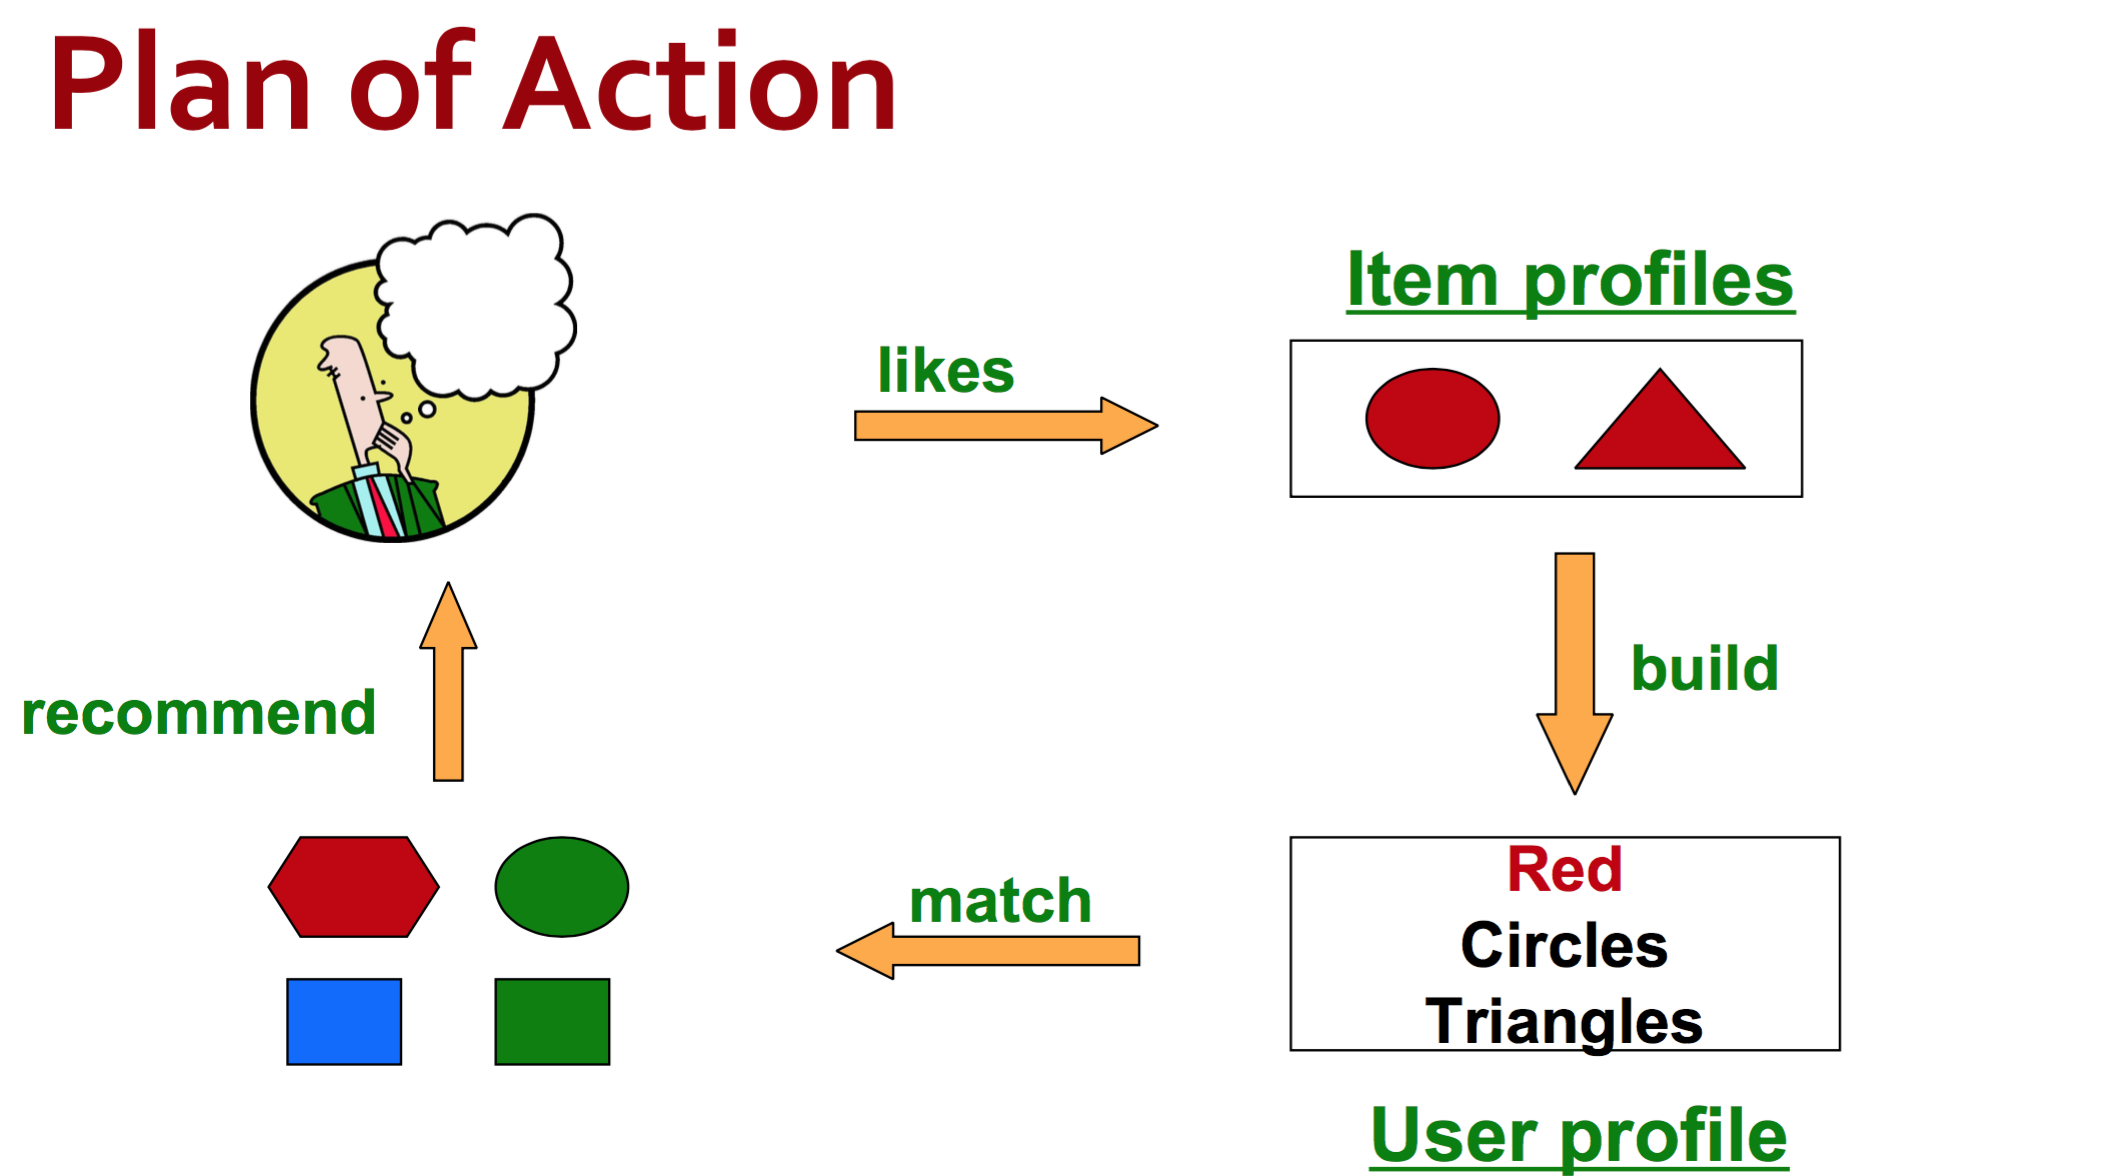

In [ ]:
df = pd.read_csv('movies.csv')
df.loc[df.genres.str.contains('Adventure'), 'Adventure'] = "1" 
df.loc[df.genres.str.contains('Animation'), 'Animation'] = "1"
df.loc[df.genres.str.contains('Action'), 'Action'] = "1"
df.loc[df.genres.str.contains('Children'), 'Children'] = "1"
df.loc[df.genres.str.contains('Comedy'), 'Comedy'] = "1"
df.loc[df.genres.str.contains('Crime'), 'Crime'] = "1"
df.loc[df.genres.str.contains('Fantasy'), 'Fantasy'] = "1"
df.loc[df.genres.str.contains('Horror'), 'Thriller'] = "1"
df.loc[df.genres.str.contains('Romance'), 'Romance'] = "1"
df.loc[df.genres.str.contains('Thriller'), 'Thriller'] = "1"
df.loc[df.genres.str.contains('Drama'), 'Drama'] = "1"
df.loc[df.genres.str.contains('Sci-Fi'), 'SciFi'] = "1"
df = df.fillna(0)

In [ ]:
df = df.drop('genres',axis=1)
df.head()

In [ ]:
n = str(input())
r1 = df.loc[df['title'] == n].iloc[0]
r2 = r1[0]
lis = []
for i in range(len(df)):
    c=0
    r = (r2 == df.iloc[i])
    for j in range(len(r)):
        if(r[j] == True):
            c = c+1        
    lis.append(c)
#print (lis)
df['rank'] = lis
df2 = df.sort_values('rank' ,ascending=False)
print("Recommended movies are:")
df2['title'].head()

## TF-IDF

TF-IDF stands for Term Frequency times Inverse document frequency. 

- TF Stands for term frequency: It tells us how often a term appeares in a document. 
- IDF stands for Inverse Document Frequency: It tells us how rare it is for a document to have this term. 
  - It is calculated by inverse of how many documents have this tag divided by the total number of documents.      Generally a log of the computed value id used to bring it to scale in which can be used. 

- Then we multiply the TF and IDF to to get a weight which is assigned to a particular search term we are looking for. 
------

Lets get started with computing the tfidf in python

In [ ]:
Ratings=pd.read_csv('drive-download-20171110T062018Z-001/ratings.csv',encoding='latin')
Movies=pd.read_csv('drive-download-20171110T062018Z-001/movies.csv',encoding='latin')
Tags=pd.read_csv('drive-download-20171110T062018Z-001/tags.csv',encoding='latin')